In [1]:
using LinearAlgebra
using Plots
using LaTeXStrings

In [40]:
function QuanWal_1D(n::Int64,ϕ::Vector{ComplexF64},H::Matrix{Float64})  
    P=2n+1 #n-1 es el número central, #numero de pasos

    kb=[[1,0],[0,1]] #BASE USUAL en un vector de vectores que contenga cada uno

    A=Array{Vector{ComplexF64}}(undef, P) #Numero de qbits
    B=Array{Vector{ComplexF64}}(undef, P)
    @inbounds for i=1:P
        A[i]=[0,0]
        B[i]=[0,0]
    end;
    A[n+1]=ϕ
    
    for k=0:n

        if k%2!=0

            for i=(n+1)-k:(n+1)+k 
                if kb[1]*transpose(kb[1])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |L><L|H|phi> es diferente de 0
                    B[i+1]=B[i+1]+kb[1]*transpose(kb[1])*(H*A[i])  #entonces en B escribira el nuevo qbit H|phi> en la posición n-1
                end                                                 #Sumandola a la anterior que estaba allí
                if kb[2]*transpose(kb[2])*(H*A[i]) != [0+0im,0+0im] #Si la proyección |R><R|H|phi> es diferente de 0
                    B[i-1]=B[i-1]+kb[2]*transpose(kb[2])*(H*A[i])   #entonces en B escribira el nuevo qbit H|phi> en la posición n+1
                end                                                  #Sumandola a la anterior que estaba allí
                for j=(n+1)-k:(n+1)+k
                    A[i]=[0,0]                                     #Por último se reescribe A para que quede en ceros [0,0]
                end
            end

        else

            for i=(n+1)-k:(n+1)+k
                if kb[1]*transpose(kb[1])*(H*B[i]) != [0+0im,0+0im]
                    A[i+1]=A[i+1]+kb[1]*transpose(kb[1])*(H*B[i])
                end
                if kb[2]*transpose(kb[2])*(H*B[i]) != [0+0im,0+0im]
                    A[i-1]=A[i-1]+kb[2]*transpose(kb[2])*(H*B[i])
                end
                for j=(n+1)-k:(n+1)+k
                    B[i]=[0,0]
                end    
            end
        end

    end
    if n%2==0
        return A
    else
        return B
    end
end

QuanWal_1D (generic function with 1 method)

  0.161196 seconds (3.04 M allocations: 256.226 MiB, 20.57% gc time)


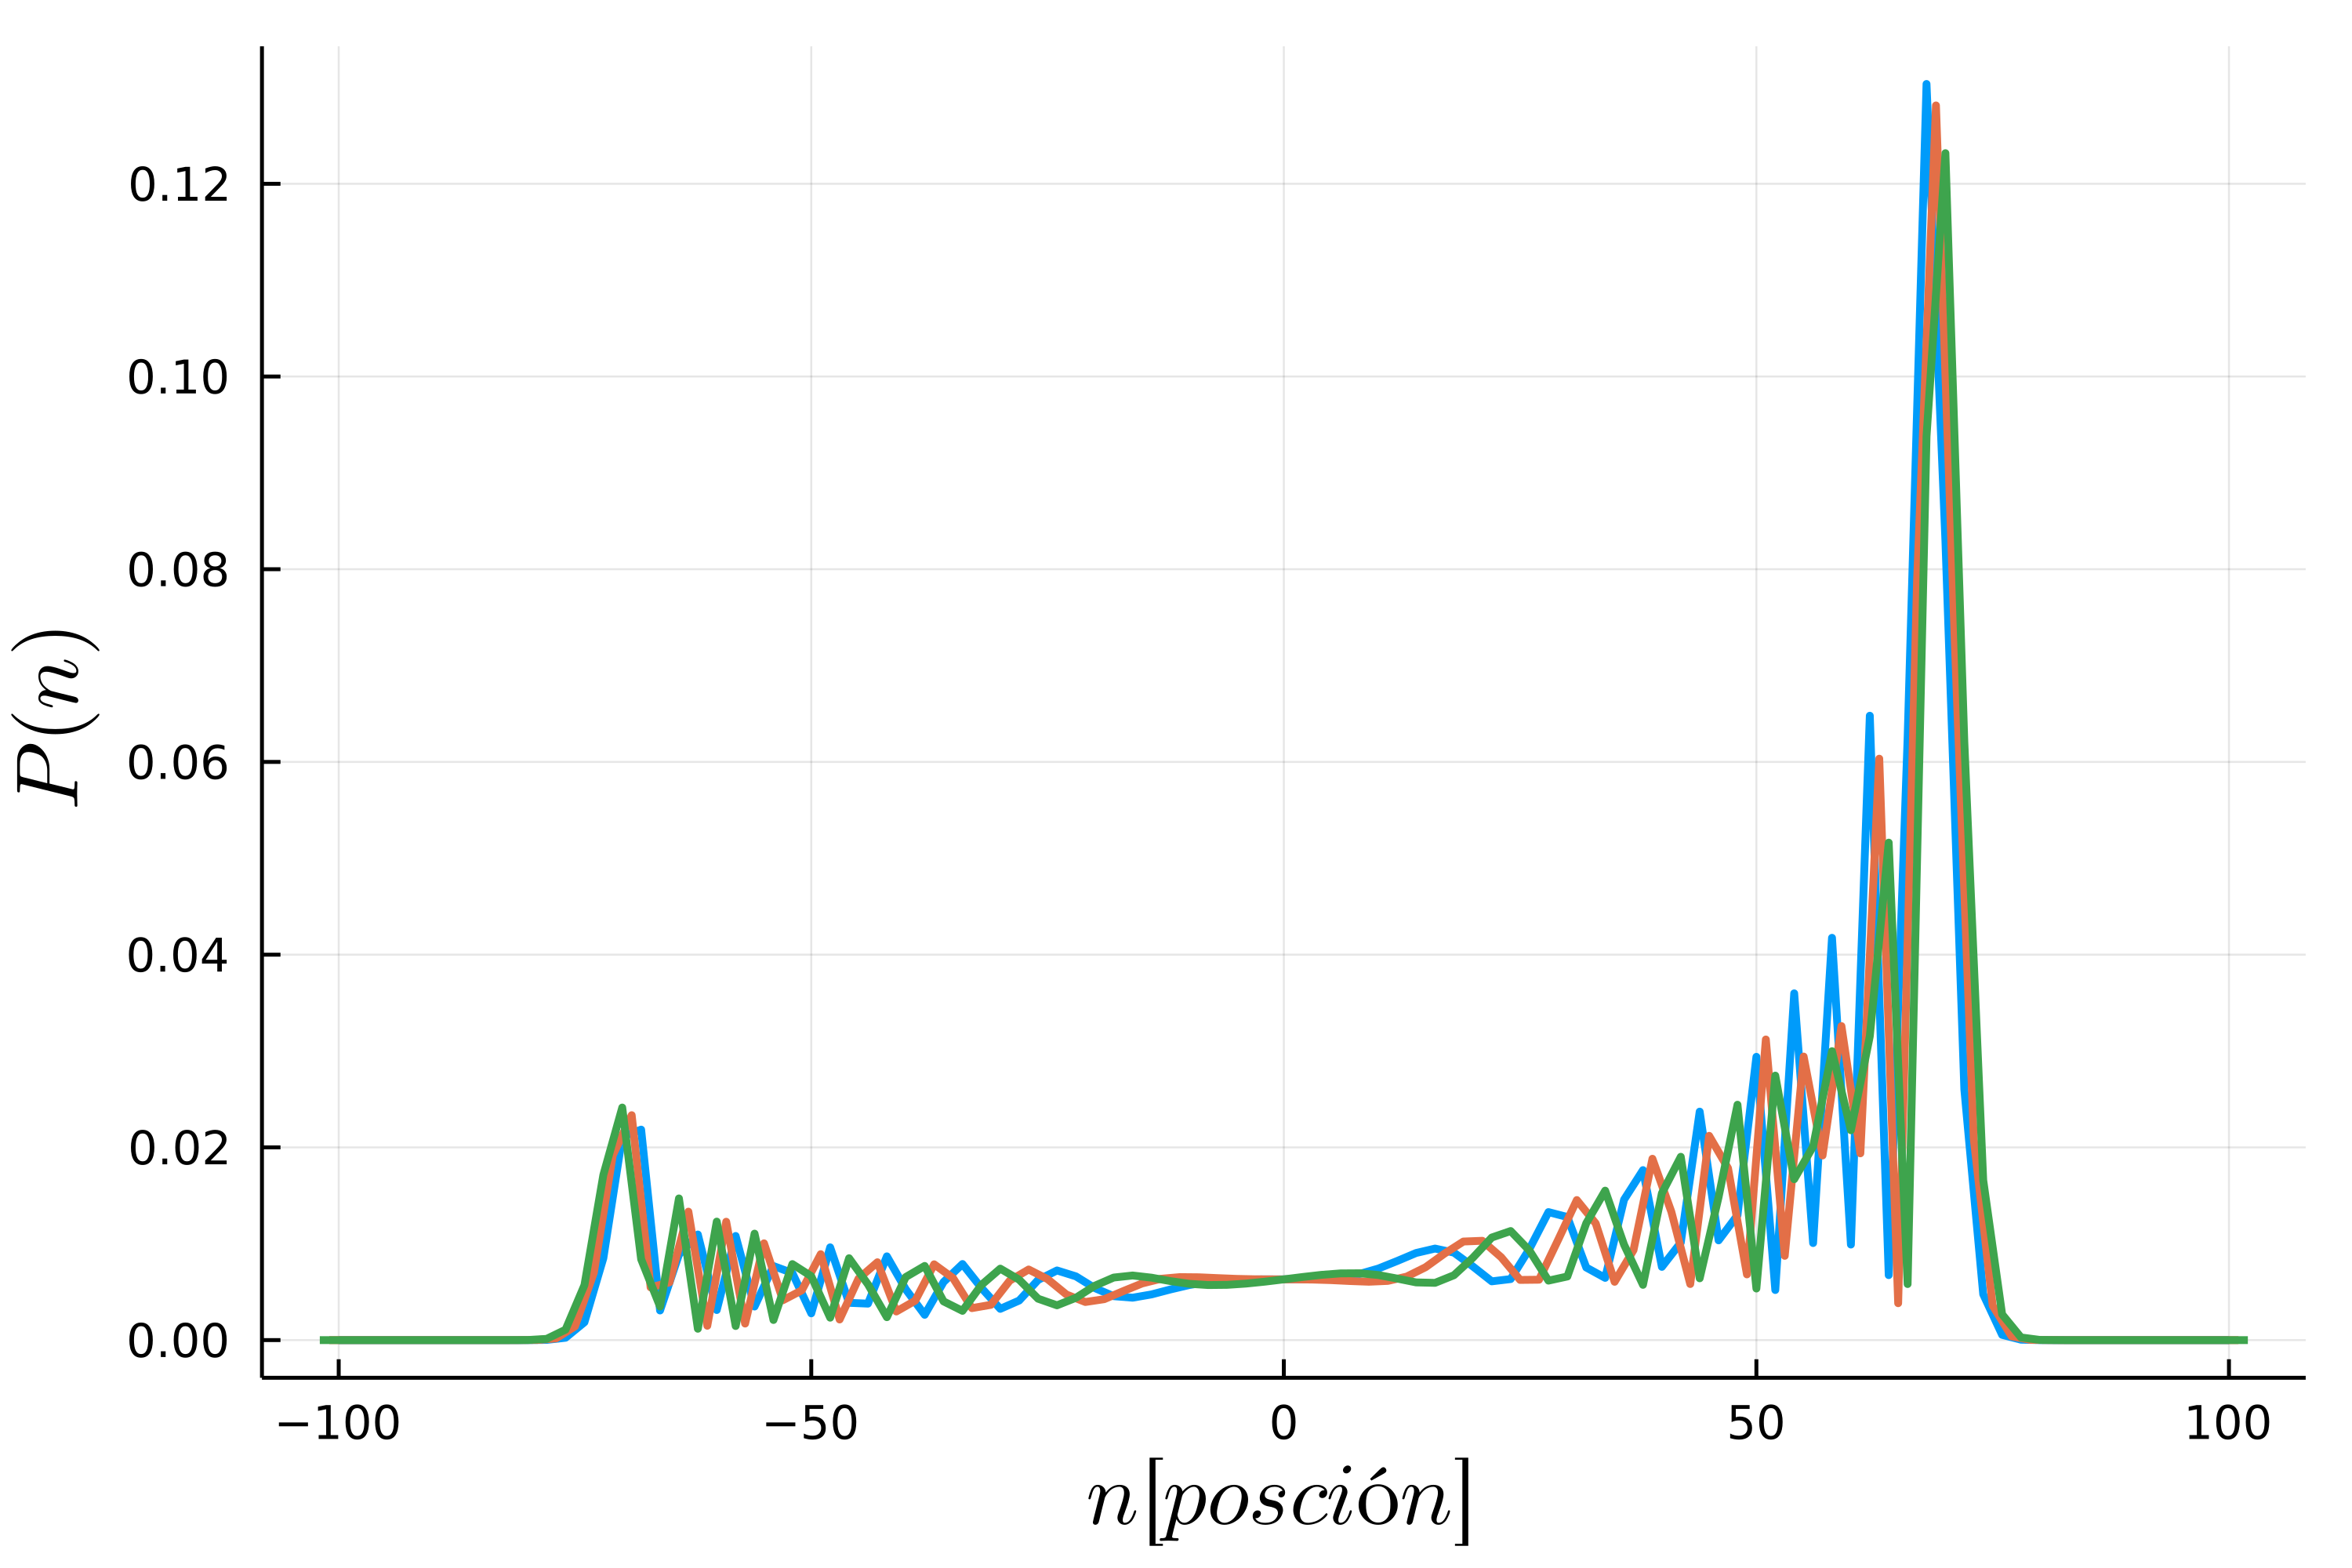

In [151]:
n=102
ϕ=1/sqrt(2)*[1, 1*im]
ϕ=1.0*[1+0*im,0+0*im]
#ϕ=1/sqrt(2)*[0+0*im,1+1*im]
H=1/sqrt(2)*[1 1; 1 -1];


f(x)=(pi*(1-x^2)*sqrt(1-(2*x^2)))^(-1)



@time G=QuanWal_1D(n,ϕ,H);


####################
###################33
################33
Space=-n:1:n
Proba=norm.(G).^2


SpaceP=zeros(0)
ProbaP=zeros(0)


for i=1:length(Space)
    if Proba[i]!=0.0
        append!(ProbaP, Proba[i])
        append!(SpaceP, Space[i])
    end
end
Numero_de_datos=length(SpaceP)
#scatter(SpaceP,ProbaP,lw=0.5,ms=2)
plot!(SpaceP,ProbaP,lw=2, label=false,ylabel=L"P(n)",xlabel=L"n[posción]",guidefont=fnt,fmt = :png, dpi=500)
#bar!((-n:1:n),norm.(G).^2)
#plot!(-(1/sqrt(2) - 0.1):0.001:(1/sqrt(2) - 0.1),x->f(x))

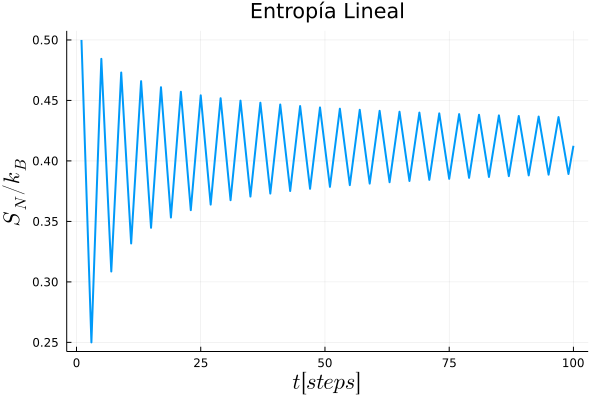

In [144]:
### Entropia Lineal

S=zeros(n)

for j=1:n
    G=QuanWal_1D(j,ϕ,H)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    S[j]=1-tr(Dst*Dst)
end
plot(S,ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=false,
    guidefont=fnt,legend=:bottomright,title="Entropía Lineal",
    legendfontsize=12.0,lw = 2)

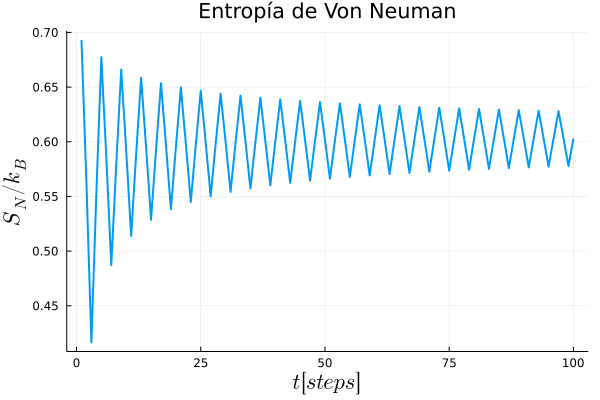

In [146]:
### Entropia Neuman con S/Kb

Sn=zeros(n)

for j=1:n
    G=QuanWal_1D(j,ϕ,H)
    Dst=zeros(ComplexF64,2,2)
    pos=length(G)
    for i=1:pos
        Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
        Dst[1,2]+=G[i][1]*conj(G[i][2])
        Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
        Dst[2,1]+=conj(G[i][1])*G[i][2]
    end
    lamb=eigvals(Dst)
    Sn[j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
end

plot(Sn,ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=false,
    guidefont=fnt,legend=:bottomright,title="Entropía de Von Neuman",
    legendfontsize=12.0,lw = 2)

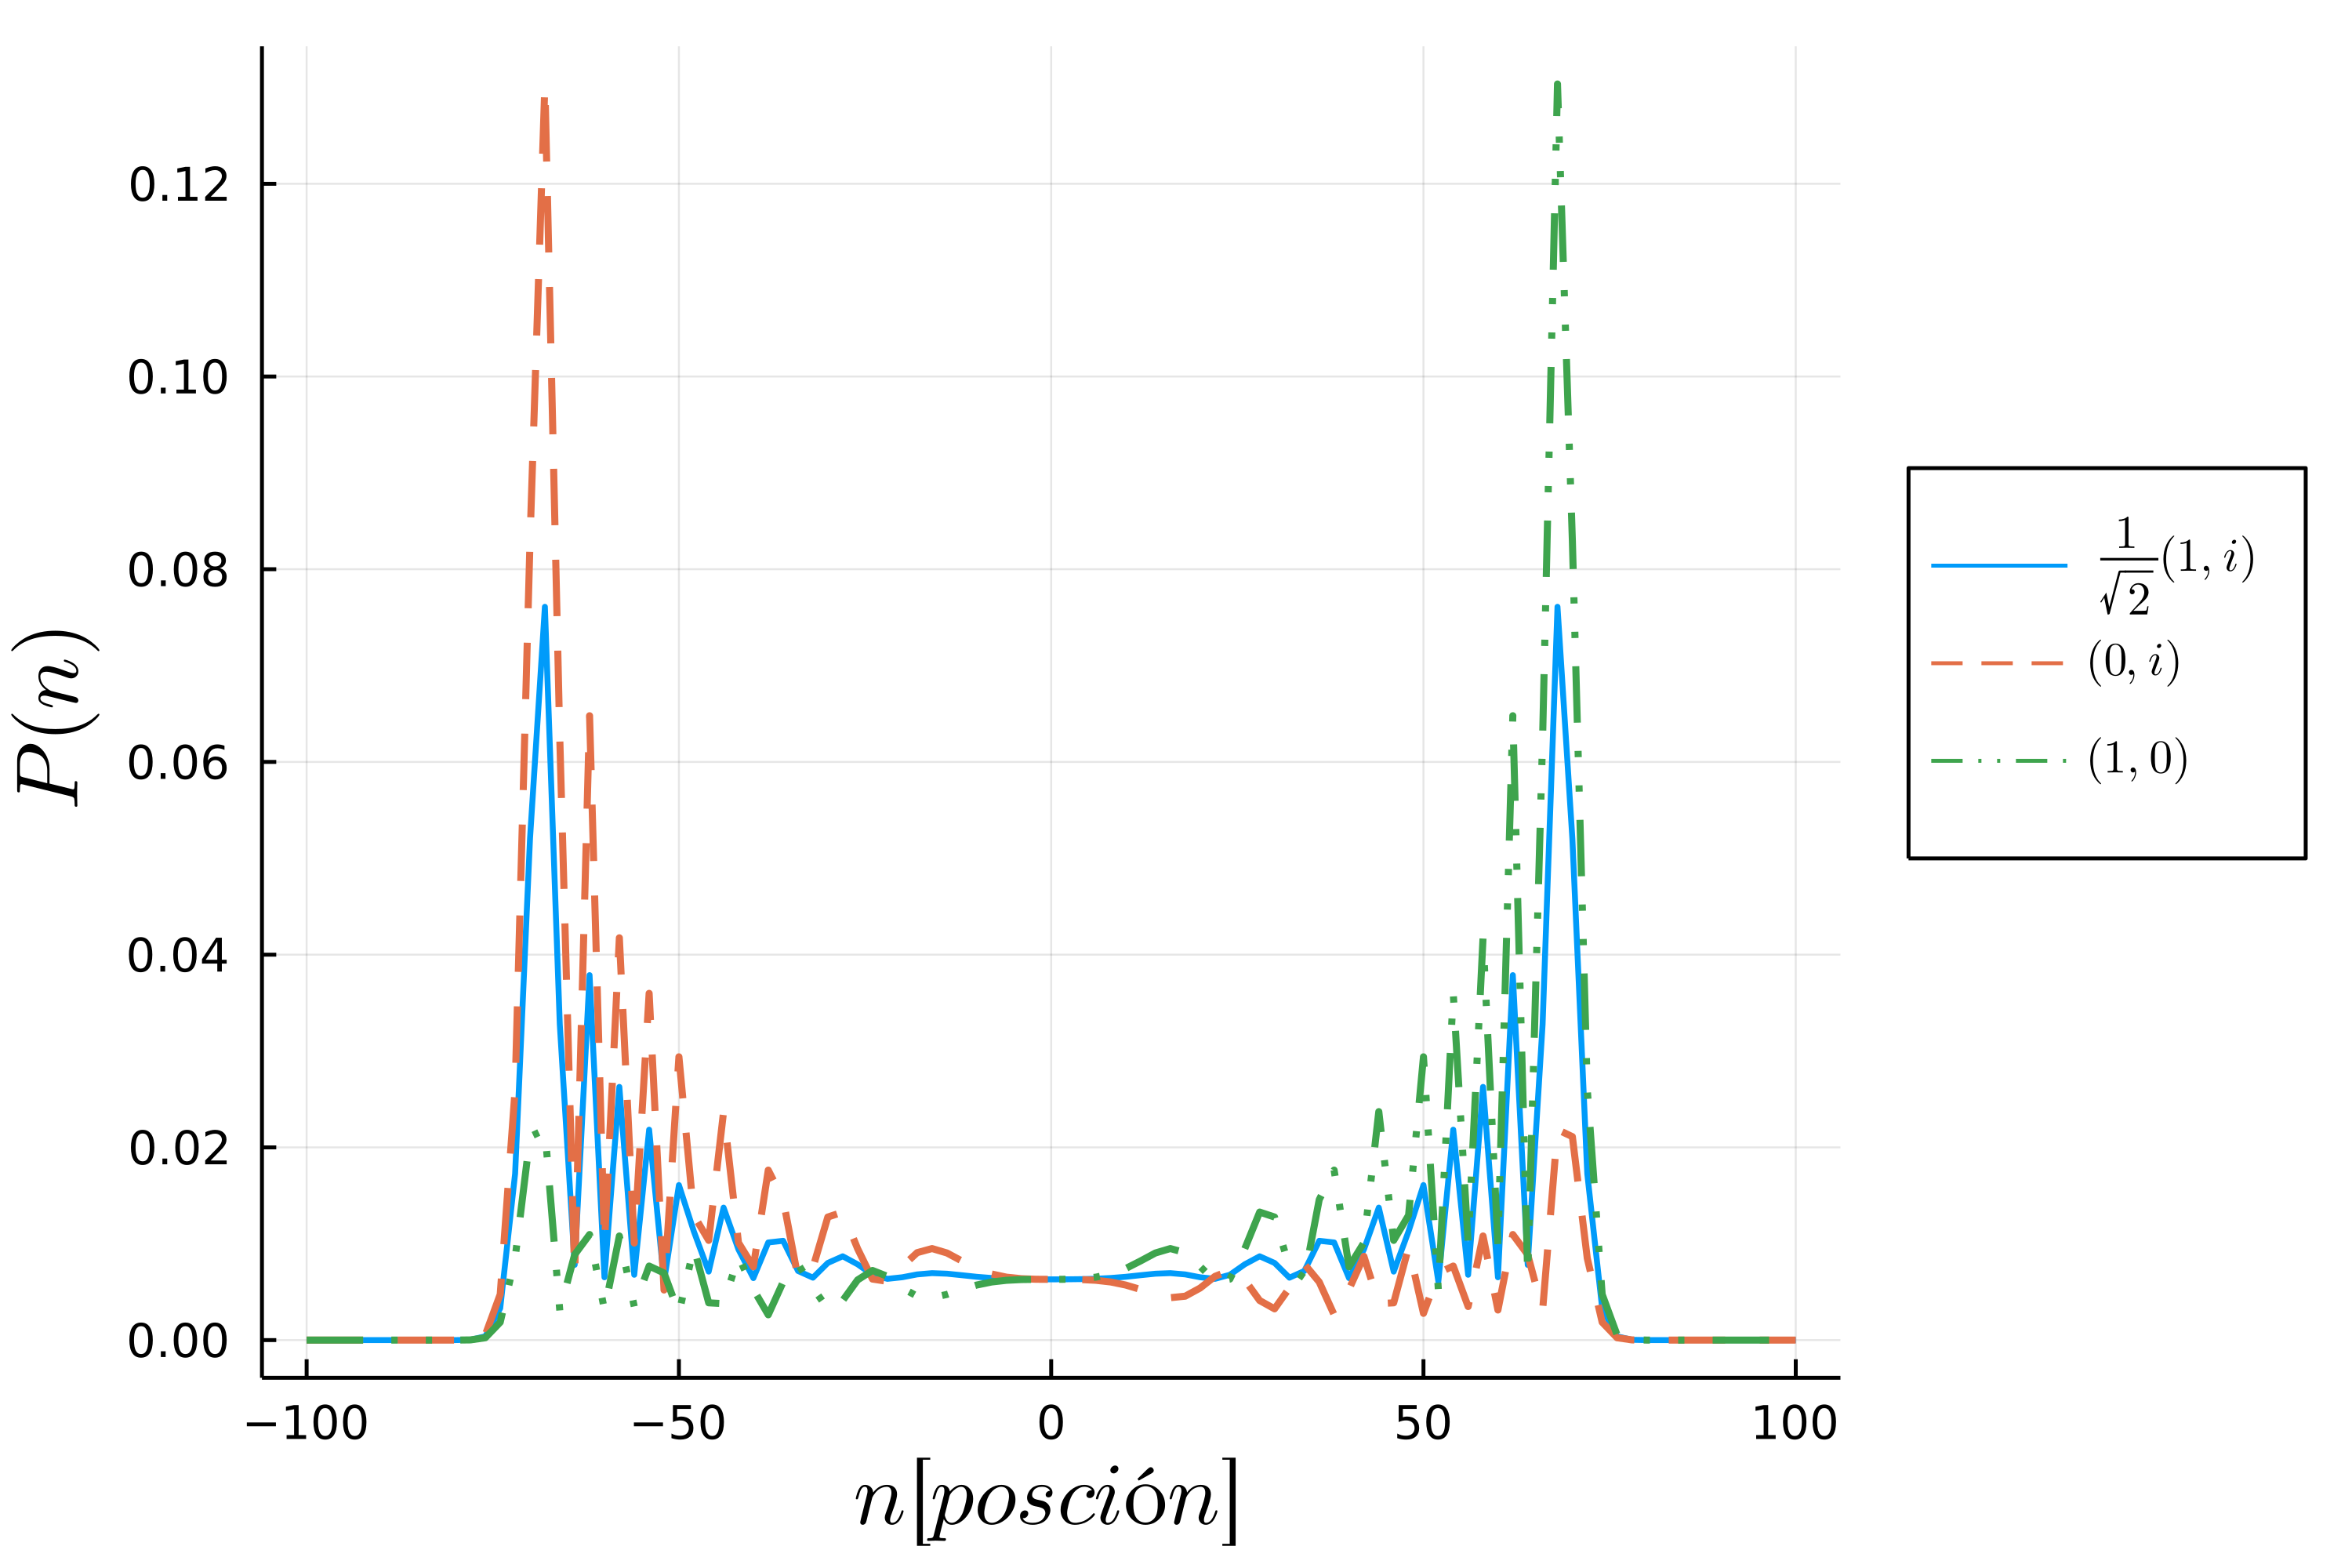

In [124]:
fnt = Plots.font("sans-serif", 15) # Para gráficar loas labels

Cond_0=[1/sqrt(2)*[1, 1*im],[0, 1*im],[1, 0*im]]

SpaceP=zeros(length(Cond_0),Numero_de_datos)
ProbaP=zeros(length(Cond_0),Numero_de_datos)

for i=1:length(Cond_0)
    G=QuanWal_1D(n,Cond_0[i],H);
    Space=-n:1:n
    Proba=norm.(G).^2
    
    Contador=1
    index=1
    while Contador != Numero_de_datos+1
        
        if Proba[index]!=0.0
            ProbaP[i,Contador]=Proba[index]
            SpaceP[i,Contador]=Space[index]
            Contador+=1
        end
        index +=1
    end
end

plot(SpaceP[1,:],ProbaP[1,:],lw=1.5, label=L"\frac{1}{\sqrt{2}}(1,i)",ylabel=L"P(n)",xlabel=L"n[posción]"
    ,legendfontsize=8.0,legend=:outerright,guidefont=fnt,fmt = :png, dpi=500)
plot!(SpaceP[2,:],ProbaP[2,:],lw=1.8, label=L"(0,i)",ls=:dash)
plot!(SpaceP[3,:],ProbaP[3,:],lw=1.8, label=L"(1,0)",ls=:dashdotdot)



In [32]:
#savefig("./Quantum_walker_Infinity_Chain_Localized.png")

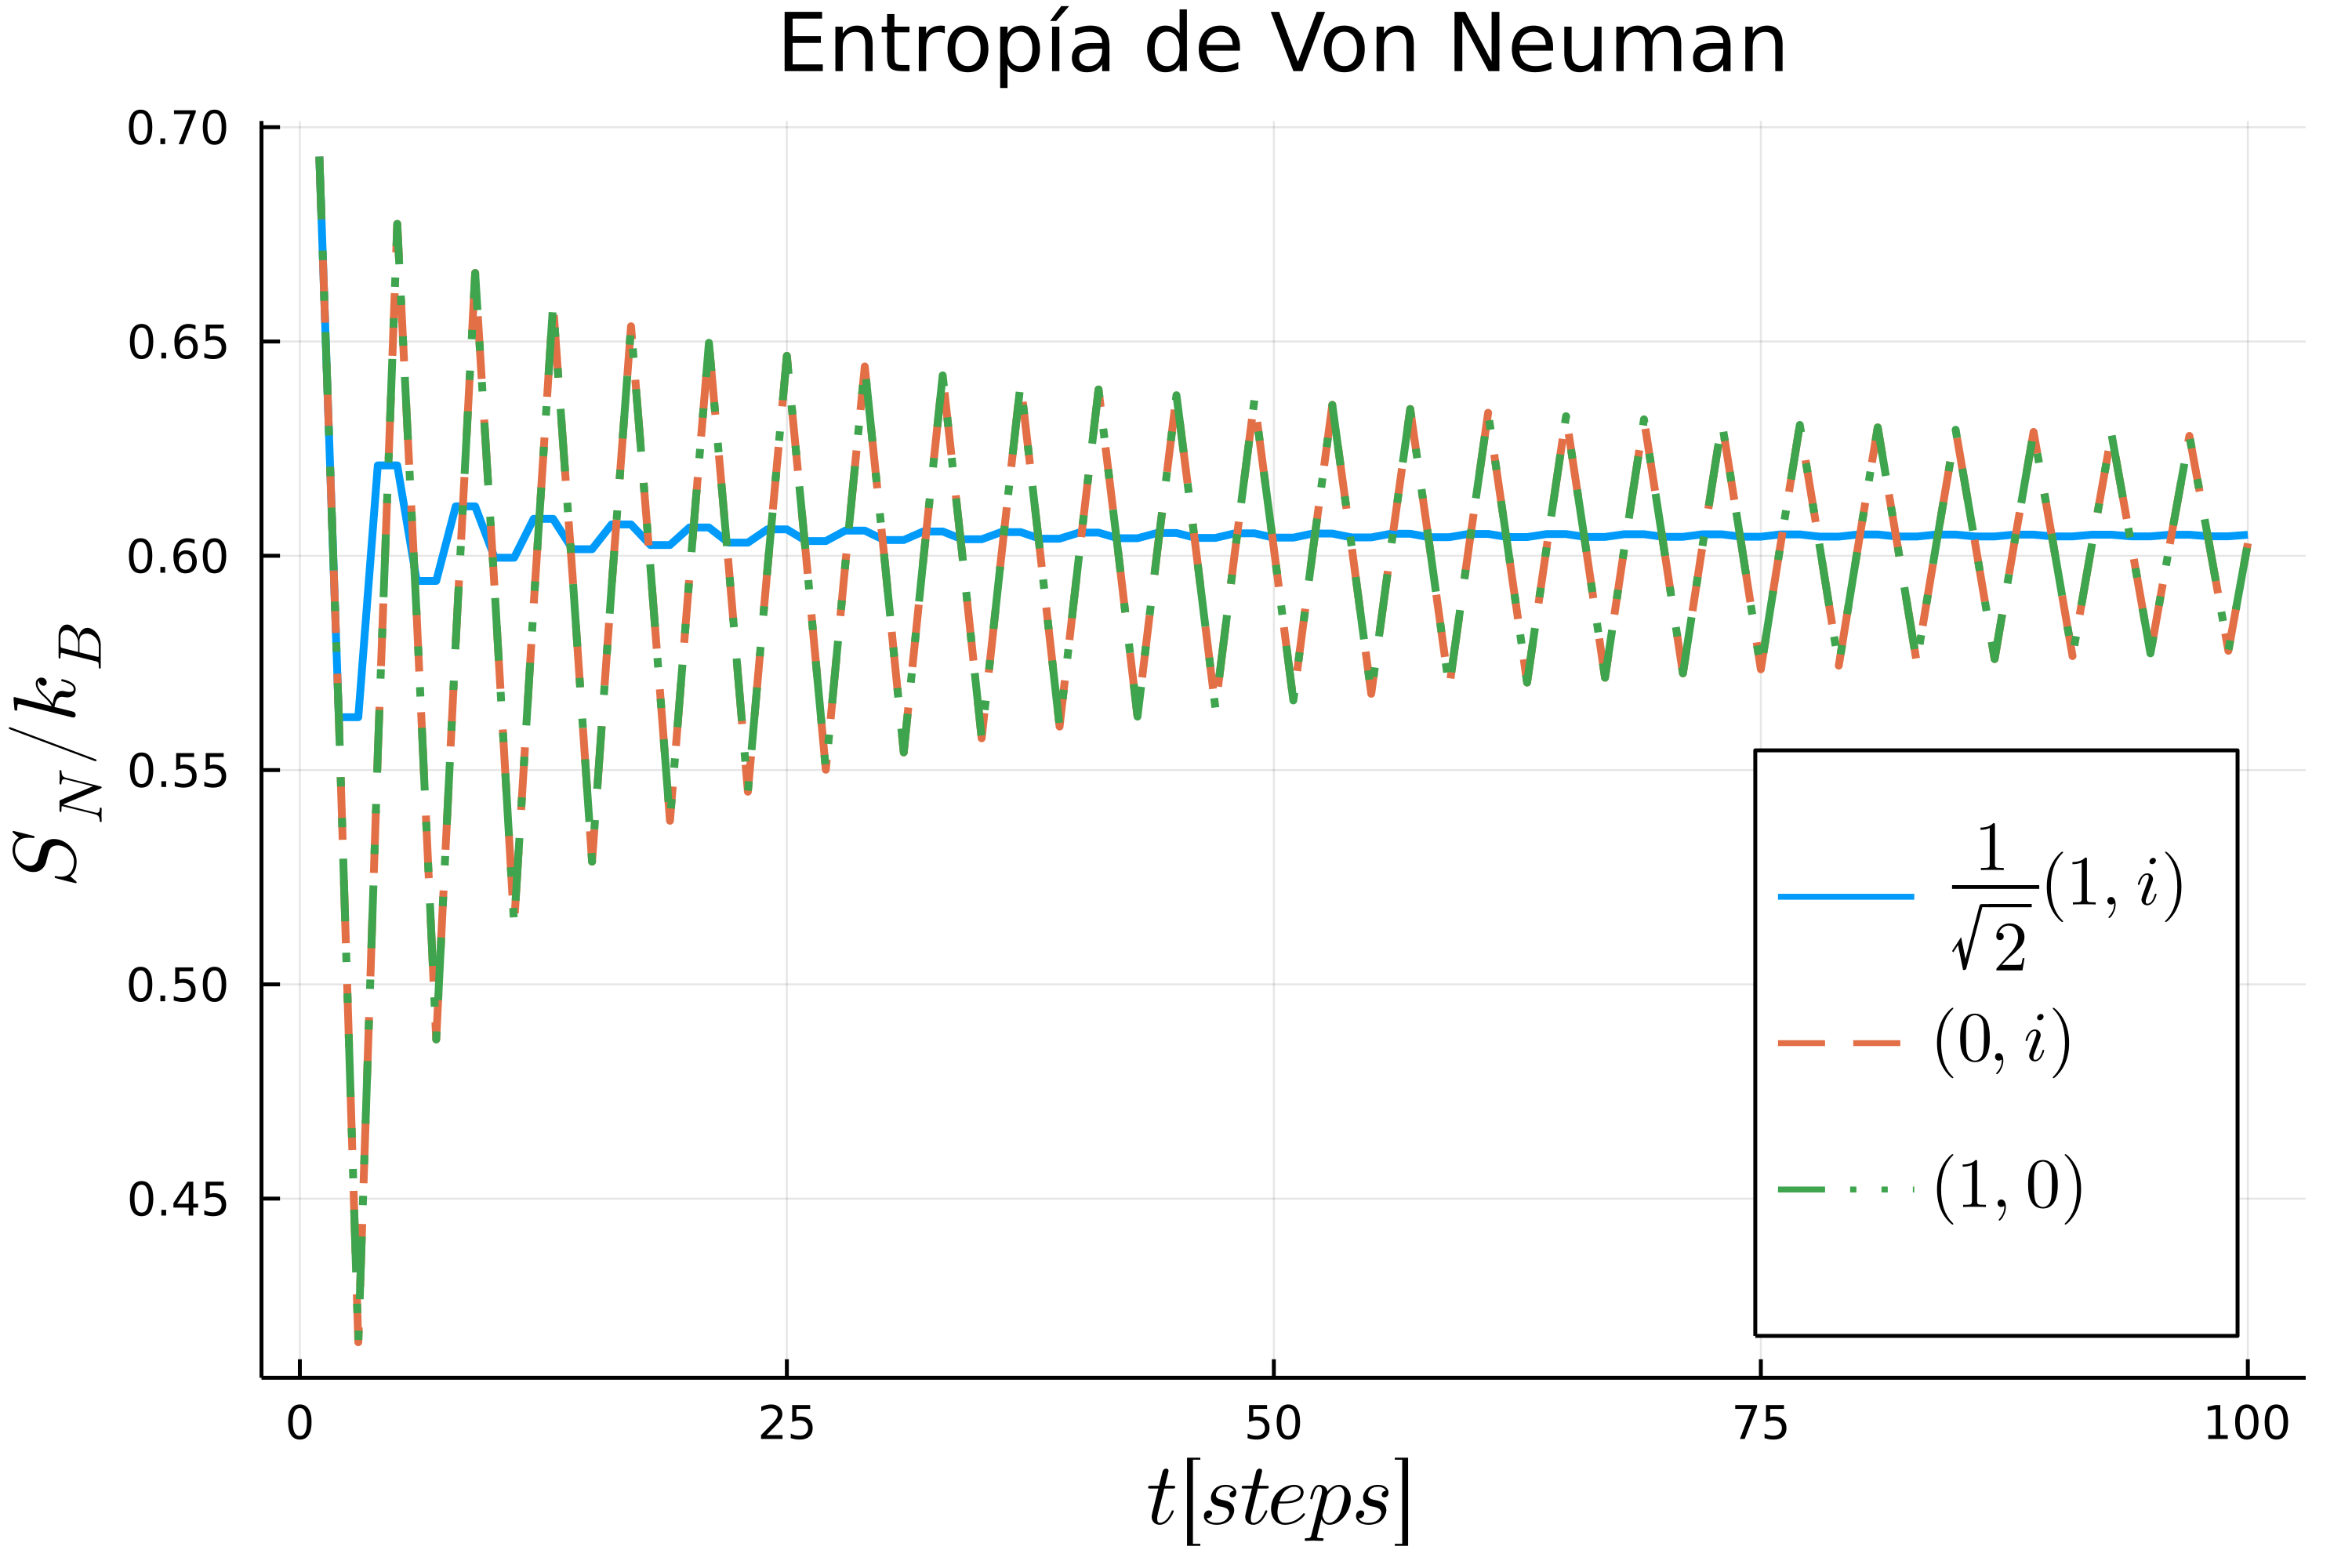

In [141]:
### Entropia Neuman con S/Kb


SnP=zeros(length(Cond_0),n)


for i=1:length(Cond_0)
    #Sn=zeros(n)

    for j=1:n
        G=QuanWal_1D(j,Cond_0[i],H)
        Dst=zeros(ComplexF64,2,2)
        pos=length(G)
        for i=1:pos
            Dst[1,1]+=abs2(G[i][1])      ### corresponde a izq
            Dst[1,2]+=G[i][1]*conj(G[i][2])
            Dst[2,2]+=abs2(G[i][2])      ### correspondiende der
            Dst[2,1]+=conj(G[i][1])*G[i][2]
        end
        lamb=eigvals(Dst)
        #Sn[j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
        SnP[i,j]=-(lamb[1]*log(lamb[1])+lamb[2]*log(lamb[2]))
    end
    
    
end

plot(SnP[1,:],ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=L"\frac{1}{\sqrt{2}}(1,i)",
        guidefont=fnt,legend=:bottomright,title="Entropía de Von Neuman",
        legendfontsize=12.0,lw = 2,fmt = :png, dpi=500)
plot!(SnP[2,:],ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=label=L"(0,i)",
        legendfontsize=12.0,lw = 2,ls=:dash
        )
plot!(SnP[3,:],ylabel=L"S_N/k_B",xlabel=L"t[steps]",label=L"(1,0)",
        legendfontsize=12.0,lw = 2,ls=:dashdotdot
        )

In [ ]:
# @time begin
#     anim= @animate for l=1:stp:paso
#         G=QuanWal_1D(l,ϕ,H)
#         bar(-l:1:l,norm.(G).^2,xlims=(-(paso),(paso)),ylims=(0,0.05),label="Tiempo=$(l)")
#     end
#     gif(anim,"./QW_ONE_real(1_1).gif", fps=30)
# end